# C. Correlations variables-target and variables/variables 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [2]:
I_D = pd.read_csv('DEF_IMMO.csv', sep=',', na_values='None')


In [3]:
I_D.columns

Index(['Unnamed: 0', 'type_of_property', 'subtype_of_property', 'locality',
       'province', 'région', 'price', 'number_of_facades', 'house_area',
       'house_area_cat', 'number_of_rooms', 'number_of_rooms_cat',
       'surface_of_the_land', 'surface_of_the_land_cat',
       'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace',
       'terrace_area', 'open_fire', 'swimming_pool', 'state_of_the_building',
       'construction_year', 'construction_year_cat'],
      dtype='object')

In [4]:
I_D.head(3)

,Unnamed: 0,type_of_property,subtype_of_property,locality,province,région,price,number_of_facades,house_area,house_area_cat,...,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool,state_of_the_building,construction_year,construction_year_cat
0,0,house,house,1050,Bruxelles-Capitale,Région Bruxelles-capitale,340000,2.0,203.0,]180-240 m²],...,1,0,NaN,1,NaN,0,0,to be done up,1901.0,1900-1919
1,1,house,villa,1880,Brabant flamand,Région flamande,525000,4.0,250.0,]240m²- ],...,1,1,430.0,1,40.0,0,0,as new,1992.0,1980-1999
2,2,house,exceptional property,4900,Liège,Région wallonne,550000,4.0,475.0,]240m²- ],...,1,1,1400.0,1,NaN,0,0,good,1853.0,older than 1900


## 1. Correlation total sample

In [5]:
I_D[['price', 'number_of_facades', 'house_area', 'number_of_rooms', 'surface_of_the_land', 'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool']].corr()

,price,number_of_facades,house_area,number_of_rooms,surface_of_the_land,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool
price,1.000000,0.236834,0.562302,0.259208,0.338731,0.023179,0.114484,0.235094,0.124479,0.332998,0.173588,0.161066
number_of_facades,0.236834,1.000000,0.310599,0.142015,0.428609,0.015581,0.153660,0.393472,0.056564,0.271851,0.168520,0.123124
house_area,0.562302,0.310599,1.000000,0.413901,0.312170,-0.001036,0.199747,0.281744,-0.005159,0.419985,0.190375,0.143540
number_of_rooms,0.259208,0.142015,0.413901,1.000000,0.143621,0.006278,0.117492,0.166487,0.001295,0.330022,0.085755,0.043972
surface_of_the_land,0.338731,0.428609,0.312170,0.143621,1.000000,0.013933,0.050238,0.874596,0.054660,0.297285,0.129688,0.154784
fully_equipped_kitchen,0.023179,0.015581,-0.001036,0.006278,0.013933,1.000000,0.080416,0.031604,0.098657,0.041687,0.078573,0.028452
garden,0.114484,0.153660,0.199747,0.117492,0.050238,0.080416,1.000000,NaN,0.068224,0.207975,0.166765,0.052076
garden_area,0.235094,0.393472,0.281744,0.166487,0.874596,0.031604,NaN,1.000000,0.040782,0.237416,0.112698,0.136259
terrace,0.124479,0.056564,-0.005159,0.001295,0.054660,0.098657,0.068224,0.040782,1.000000,NaN,0.039186,0.048975
terrace_area,0.332998,0.271851,0.419985,0.330022,0.297285,0.041687,0.207975,0.237416,NaN,1.000000,0.151661,0.130620


In [6]:
var_corr= I_D[['price', 'number_of_facades', 'house_area', 'number_of_rooms', 'surface_of_the_land', 'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool']].corr()

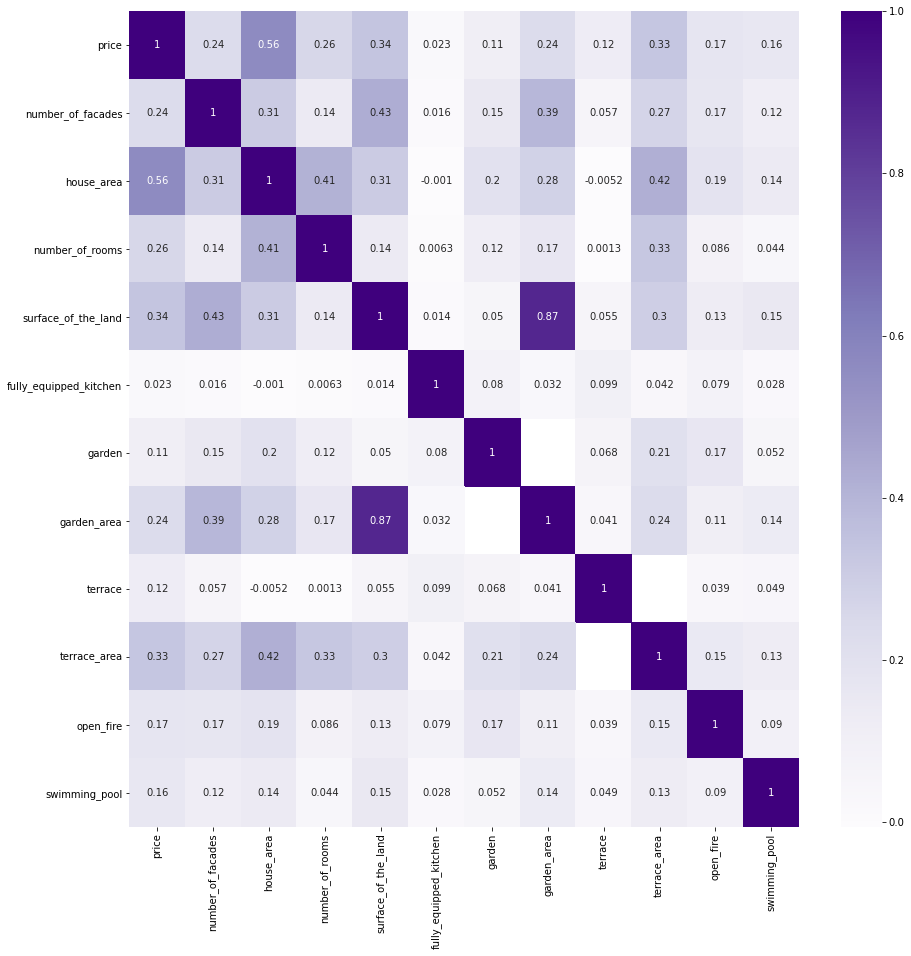

In [7]:
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, cmap="Purples")


## 2. Correlation house subsample

In [8]:
house= I_D[I_D['type_of_property']=='house']

In [9]:
house.head(3)

,Unnamed: 0,type_of_property,subtype_of_property,locality,province,région,price,number_of_facades,house_area,house_area_cat,...,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool,state_of_the_building,construction_year,construction_year_cat
0,0,house,house,1050,Bruxelles-Capitale,Région Bruxelles-capitale,340000,2.0,203.0,]180-240 m²],...,1,0,NaN,1,NaN,0,0,to be done up,1901.0,1900-1919
1,1,house,villa,1880,Brabant flamand,Région flamande,525000,4.0,250.0,]240m²- ],...,1,1,430.0,1,40.0,0,0,as new,1992.0,1980-1999
2,2,house,exceptional property,4900,Liège,Région wallonne,550000,4.0,475.0,]240m²- ],...,1,1,1400.0,1,NaN,0,0,good,1853.0,older than 1900


### Correlation matrix quantitatives variables (including 0/1 encoding) - target

In [10]:
H_var_corr= house[['price', 'number_of_facades', 'house_area', 'number_of_rooms', 'surface_of_the_land', 'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool']].corr()

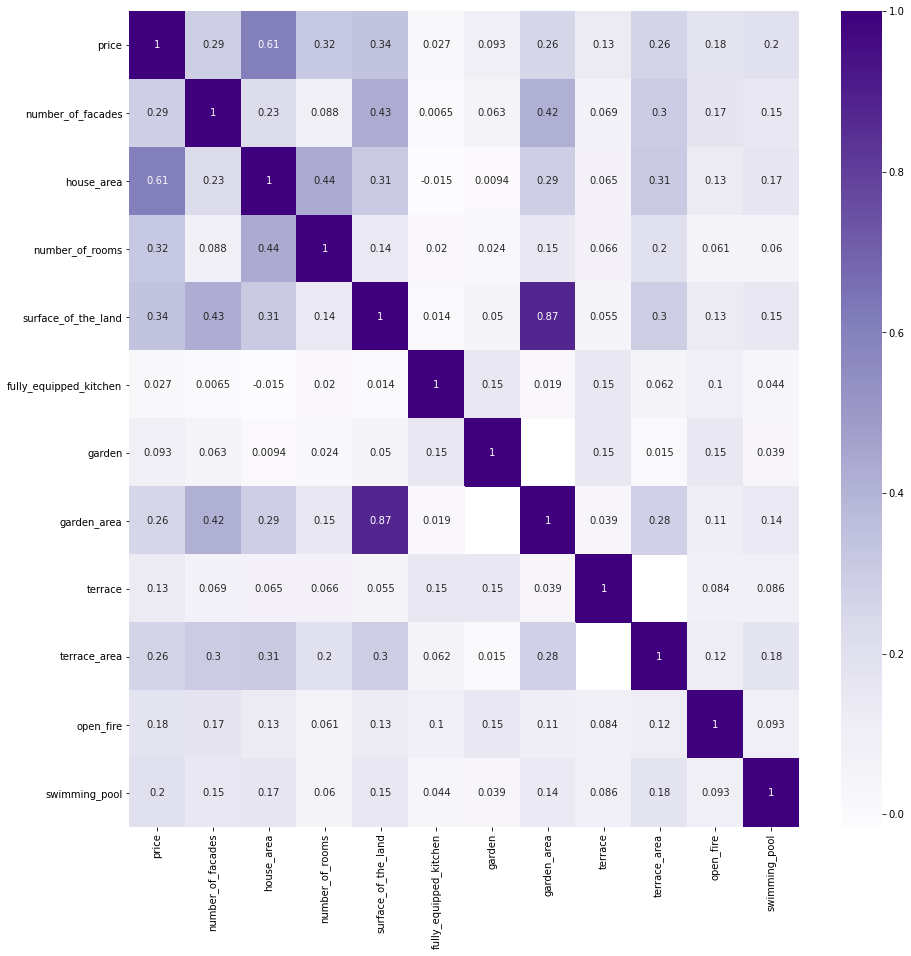

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(H_var_corr, xticklabels=H_var_corr.columns, yticklabels=H_var_corr.columns, annot=True, cmap="Purples")


### Scatter plot continuous quantitatives variables (excluding 0/1 encoding) - target

In [12]:
H_var_sf= house[['price', 'house_area', 'surface_of_the_land', 'garden_area', 'terrace_area']]

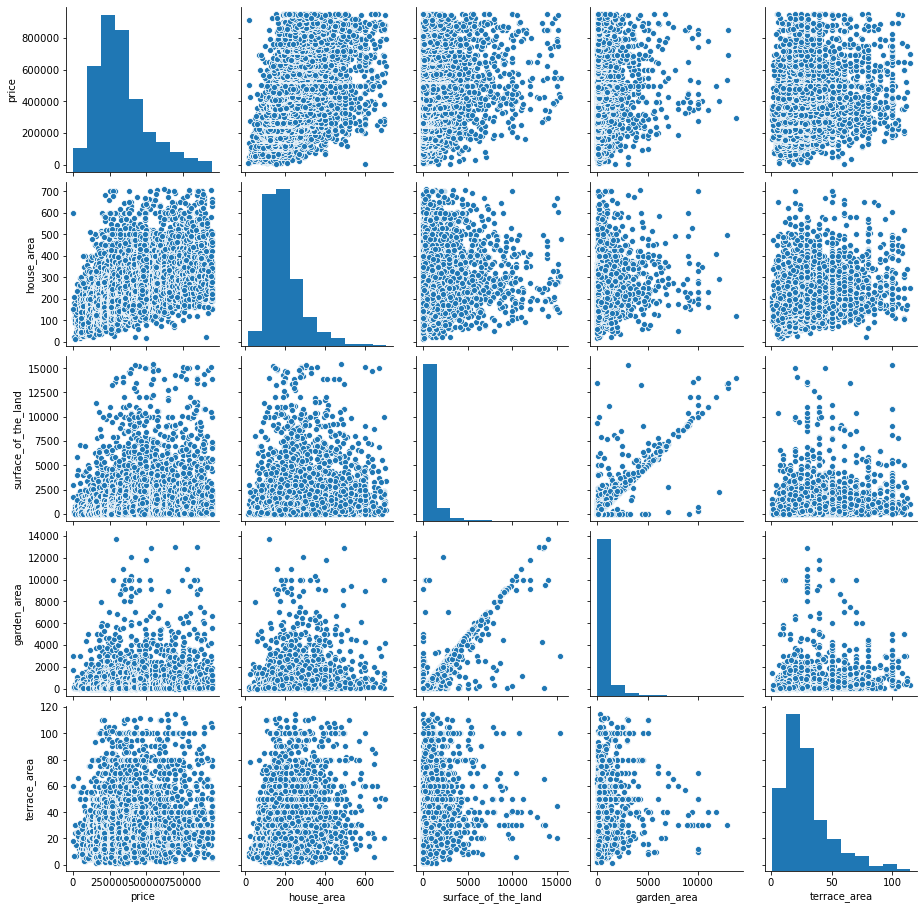

In [13]:
sns.pairplot(H_var_sf)


### Correlation subtypes propertis (dummy coding) - price

In [73]:
OH_subtype_properties = pd.get_dummies(house[['price','subtype_of_property']], prefix='H',columns = ['subtype_of_property'], drop_first=False)
OH_subtype_properties.head(3)

,price,H_apartment block,H_bungalow,H_castle,H_chalet,H_country cottage,H_exceptional property,H_farmhouse,H_house,H_manor house,H_mansion,H_mixed use building,H_other property,H_pavilion,H_town house,H_villa
0,340000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,525000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,550000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [74]:
OH_SP_corr = OH_subtype_properties.corr()

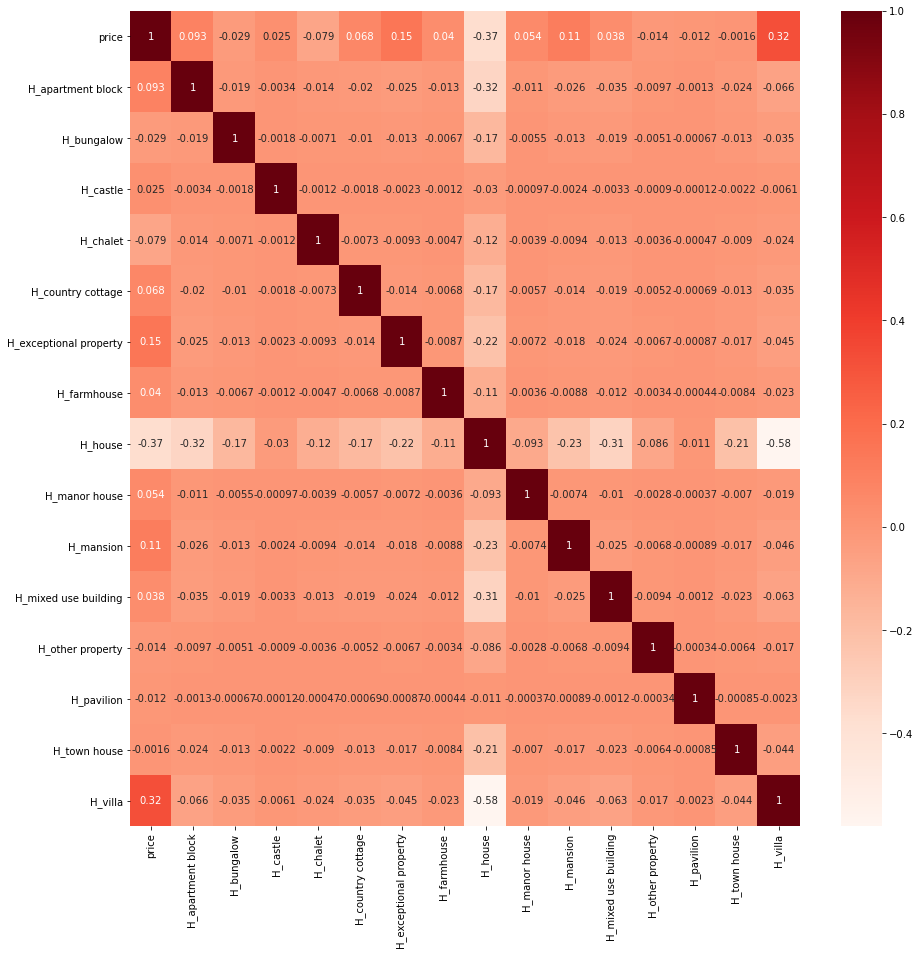

In [75]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(OH_SP_corr, xticklabels=OH_SP_corr.columns, yticklabels=OH_SP_corr.columns, annot=True, cmap="Reds")

### Correlation province (dummy coding) - price

In [76]:
OH_province = pd.get_dummies(house[['price','province']], prefix='H',columns = ['province'], drop_first=False)
OH_province.head(3)

,price,H_Anvers,H_Brabant flamand,H_Brabant wallon,H_Bruxelles-Capitale,H_Flandre-Occidentale,H_Flandre-Orientale,H_Hainaut,H_Limbourg,H_Liège,H_Luxembourg,H_Namur
0,340000,0,0,0,1,0,0,0,0,0,0,0
1,525000,0,1,0,0,0,0,0,0,0,0,0
2,550000,0,0,0,0,0,0,0,0,1,0,0


In [77]:
OH_prov_corr = OH_province.corr()

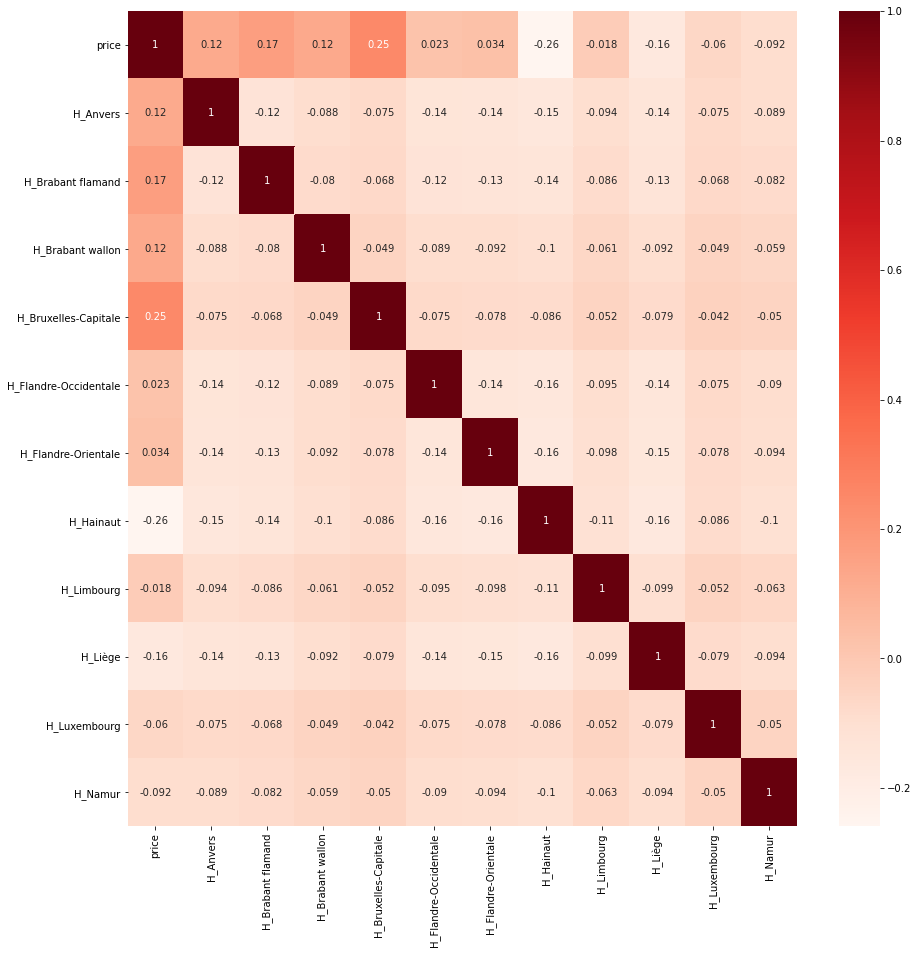

In [78]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(OH_prov_corr, xticklabels=OH_prov_corr.columns, yticklabels=OH_prov_corr.columns, annot=True, cmap="Reds")

### Correlation region (dummy coding) - price

In [83]:
OH_region = pd.get_dummies(house[['price','région']], prefix='H',columns = ['région'], drop_first=False)
OH_region.head(3)

,price,H_Région Bruxelles-capitale,H_Région flamande,H_Région wallonne
0,340000,1,0,0
1,525000,0,1,0
2,550000,0,0,1


In [84]:
OH_reg_corr = OH_region.corr()

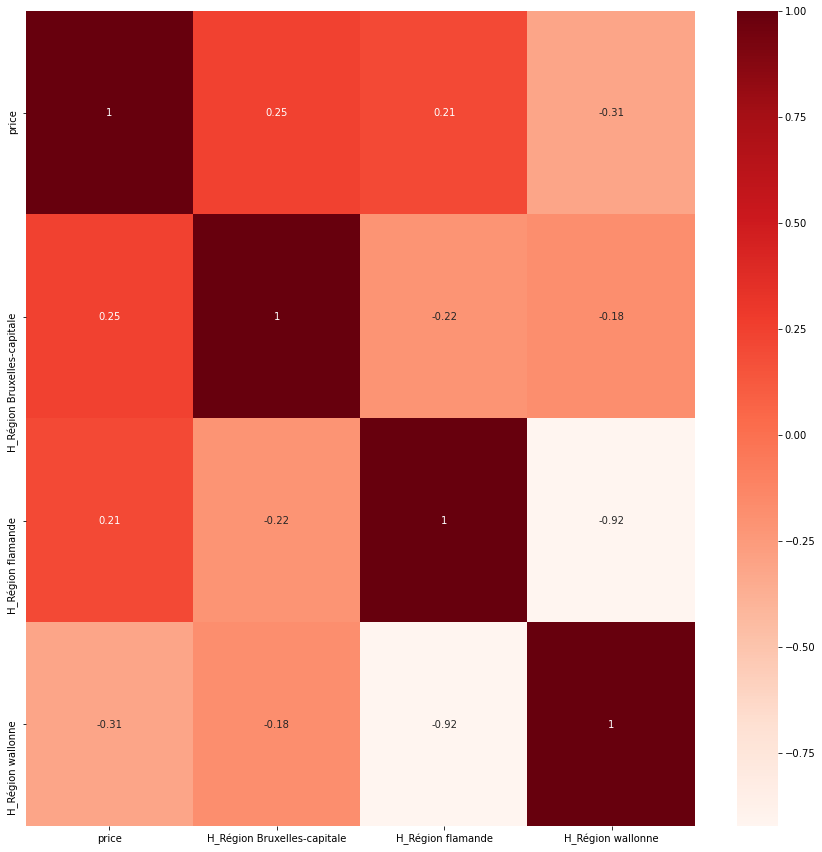

In [86]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(OH_reg_corr, xticklabels=OH_reg_corr.columns, yticklabels=OH_reg_corr.columns, annot=True, cmap="Reds")

### Correlation building state (dummy coding) - price

In [87]:
OH_buildS = pd.get_dummies(house[['price','state_of_the_building']], prefix='H',columns = ['state_of_the_building'], drop_first=False)
OH_buildS.head(3)

,price,H_as new,H_good,H_just renovated,H_to be done up,H_to renovate,H_to restore
0,340000,0,0,0,1,0,0
1,525000,1,0,0,0,0,0
2,550000,0,1,0,0,0,0


In [88]:
OH_BS_corr = OH_buildS.corr()

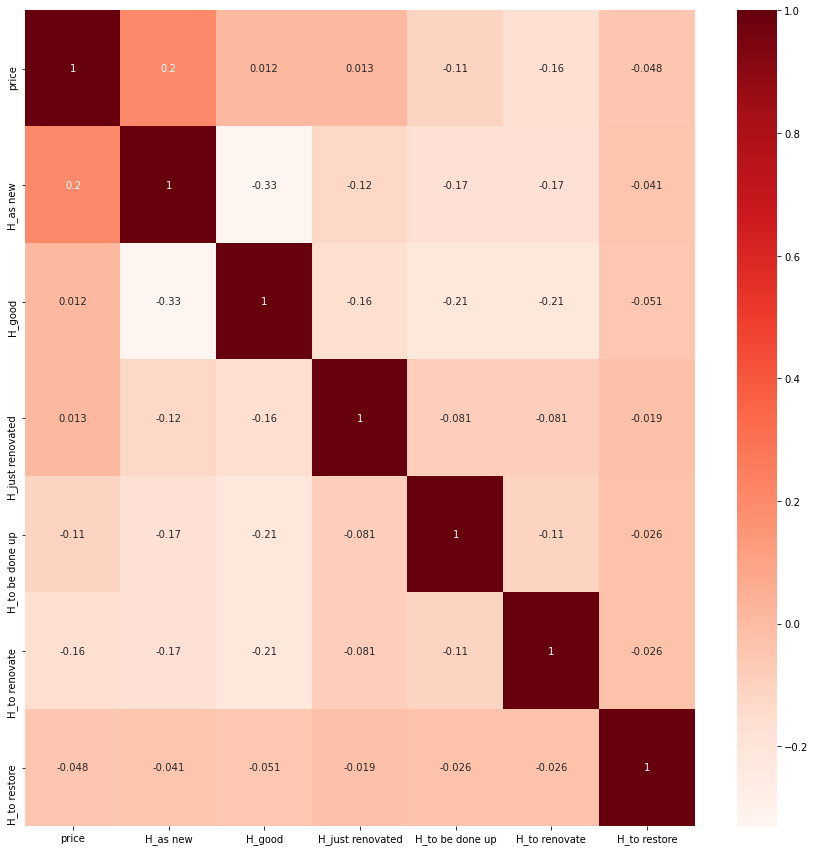

In [89]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(OH_BS_corr, xticklabels=OH_BS_corr.columns, yticklabels=OH_BS_corr.columns, annot=True, cmap="Reds")

### Correlation construction_year_cat (dummy coding) - price

In [93]:
OH_constr_year = pd.get_dummies(house[['price','construction_year_cat']], prefix='H',columns = ['construction_year_cat'], drop_first=False)
OH_constr_year.head(3)

,price,H_1900-1919,H_1920-1939,H_1940-1959,H_1960-1979,H_1980-1999,H_2000-,H_older than 1900
0,340000,1,0,0,0,0,0,0
1,525000,0,0,0,0,1,0,0
2,550000,0,0,0,0,0,0,1


In [94]:
OH_constr_year_corr = OH_constr_year.corr()

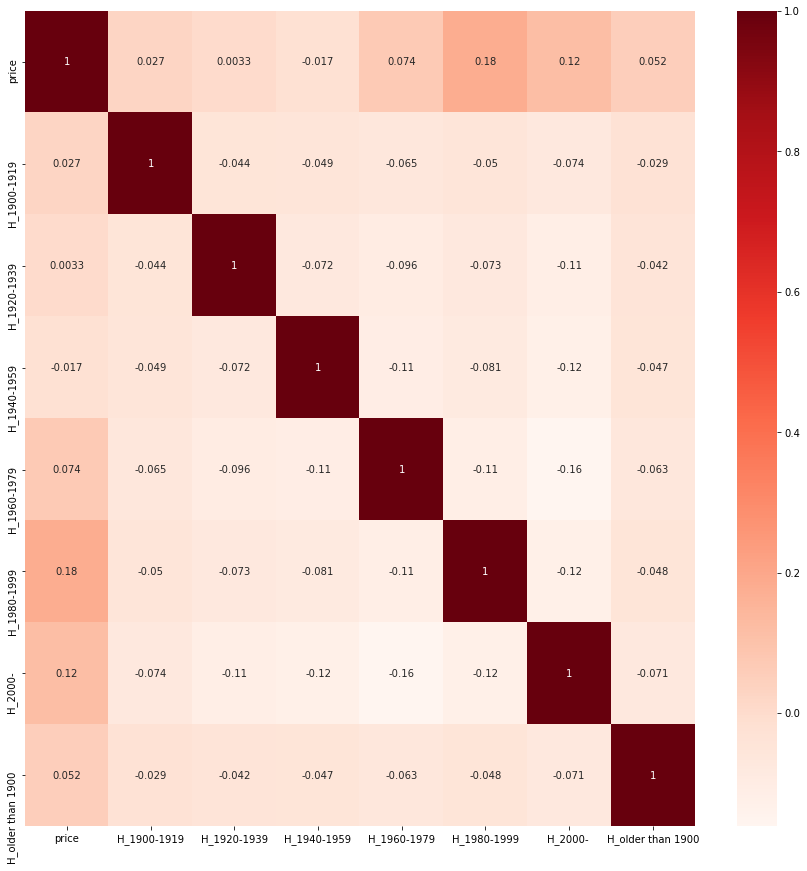

In [95]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(OH_constr_year_corr, xticklabels=OH_constr_year_corr.columns, yticklabels=OH_constr_year_corr.columns, annot=True, cmap="Reds")

## 2. Correlation appart subsample

In [97]:
apart= I_D[I_D['type_of_property']=='apartment']

In [98]:
apart.head(3)

,Unnamed: 0,type_of_property,subtype_of_property,locality,province,région,price,number_of_facades,house_area,house_area_cat,...,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool,state_of_the_building,construction_year,construction_year_cat
3665,3665,apartment,apartment,4000,Liège,Région wallonne,45000,2.0,47.0,[0-60 m²],...,0,0,NaN,1,2.0,0,0,good,1958.0,1940-1959
3666,3666,apartment,apartment,4020,Liège,Région wallonne,25000,2.0,125.0,]120-180 m²],...,1,0,NaN,1,8.0,1,0,as new,1975.0,1960-1979
3667,3667,apartment,apartment,4020,Liège,Région wallonne,25000,NaN,142.0,]120-180 m²],...,1,0,NaN,1,4.0,0,0,as new,NaN,NaN


### Correlation matrix quantitatives variables (including 0/1 encoding) - target

In [101]:
A_var_corr= apart[['price', 'number_of_facades', 'house_area', 'number_of_rooms', 'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool']].corr()

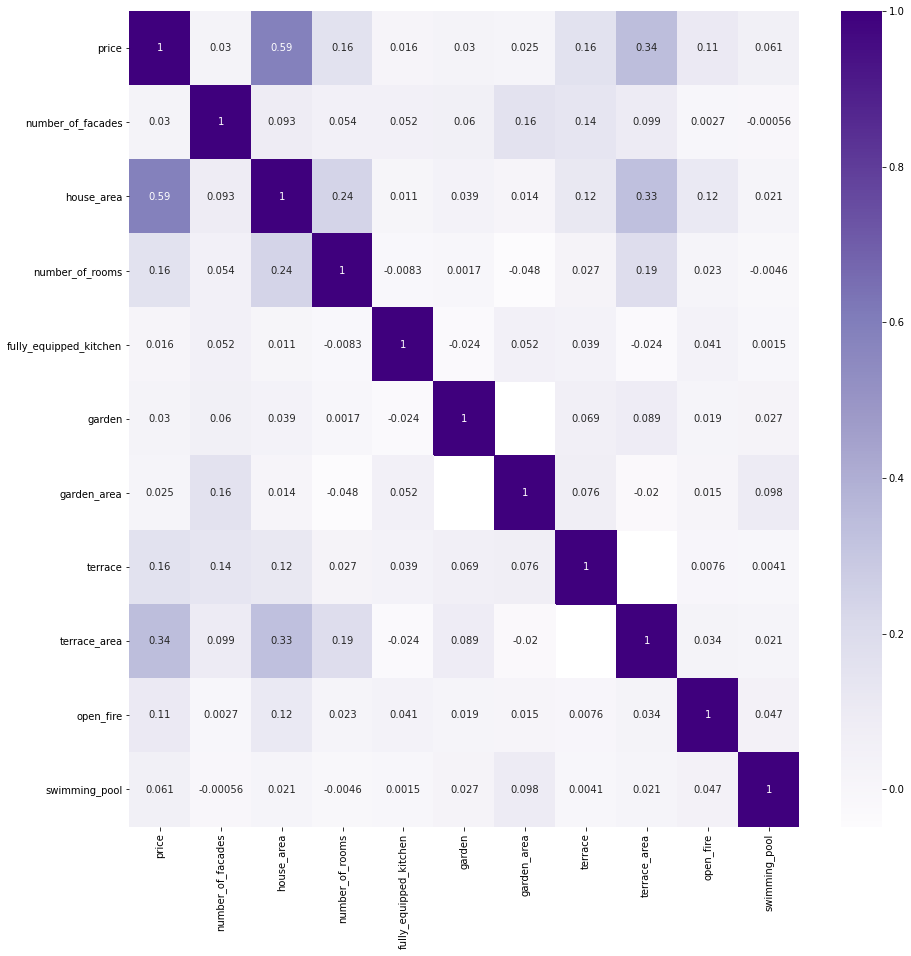

In [102]:
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(A_var_corr, xticklabels=A_var_corr.columns, yticklabels=A_var_corr.columns, annot=True, cmap="Purples")


### Scatter plot continuous quantitatives variables (excluding 0/1 encoding) - target

In [106]:
A_var_sf= house[['price', 'house_area', 'garden_area', 'terrace_area']]

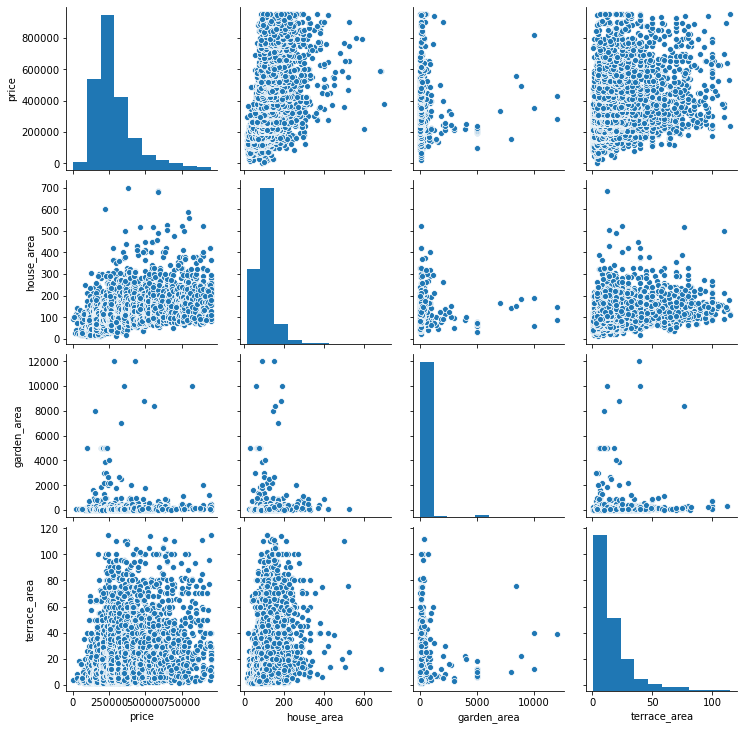

In [107]:
sns.pairplot(A_var_sf)


### Correlation subtypes propertis (dummy coding) - price

In [108]:
AOH_subtype_properties = pd.get_dummies(apart[['price','subtype_of_property']], prefix='A',columns = ['subtype_of_property'], drop_first=False)
AOH_subtype_properties.head(3)

,price,A_apartment,A_duplex,A_flat studio,A_ground floor,A_kot,A_loft,A_penthouse,A_service flat,A_triplex
3665,45000,1,0,0,0,0,0,0,0,0
3666,25000,1,0,0,0,0,0,0,0,0
3667,25000,1,0,0,0,0,0,0,0,0


In [109]:
AOH_SP_corr = AOH_subtype_properties.corr()

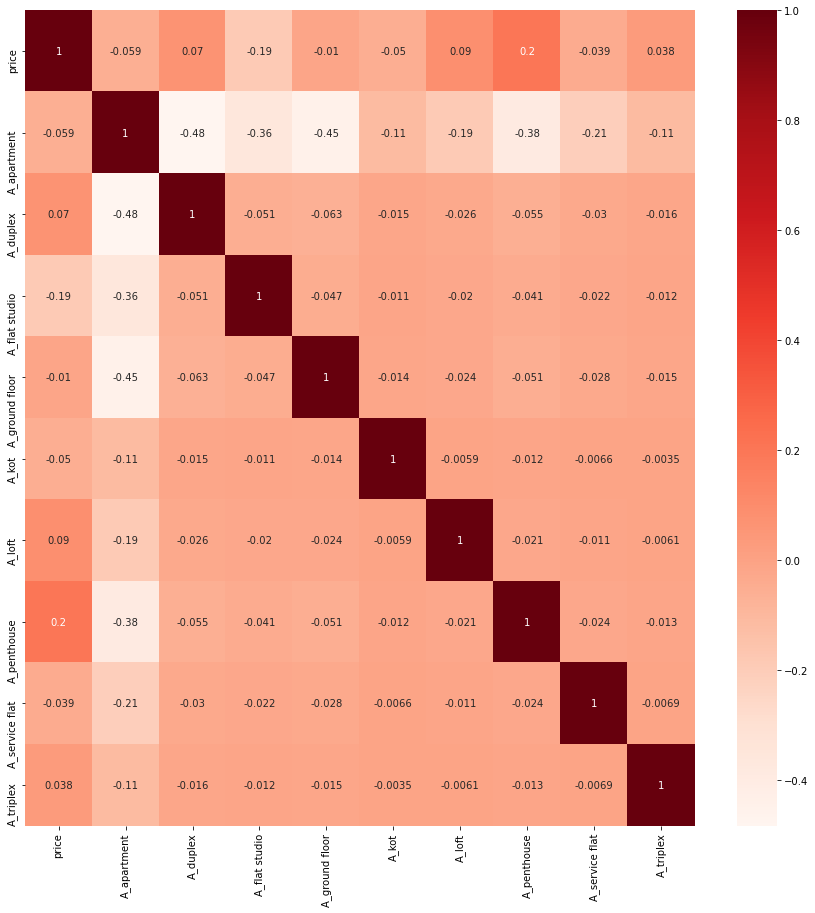

In [110]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(AOH_SP_corr, xticklabels=AOH_SP_corr.columns, yticklabels=AOH_SP_corr.columns, annot=True, cmap="Reds")

### Correlation province (dummy coding) - price

In [111]:
AOH_province = pd.get_dummies(apart[['price','province']], prefix='A',columns = ['province'], drop_first=False)
AOH_province.head(3)

,price,A_Anvers,A_Brabant flamand,A_Brabant wallon,A_Bruxelles-Capitale,A_Flandre-Occidentale,A_Flandre-Orientale,A_Hainaut,A_Limbourg,A_Liège,A_Luxembourg,A_Namur
3665,45000,0,0,0,0,0,0,0,0,1,0,0
3666,25000,0,0,0,0,0,0,0,0,1,0,0
3667,25000,0,0,0,0,0,0,0,0,1,0,0


In [112]:
AOH_prov_corr = AOH_province.corr()

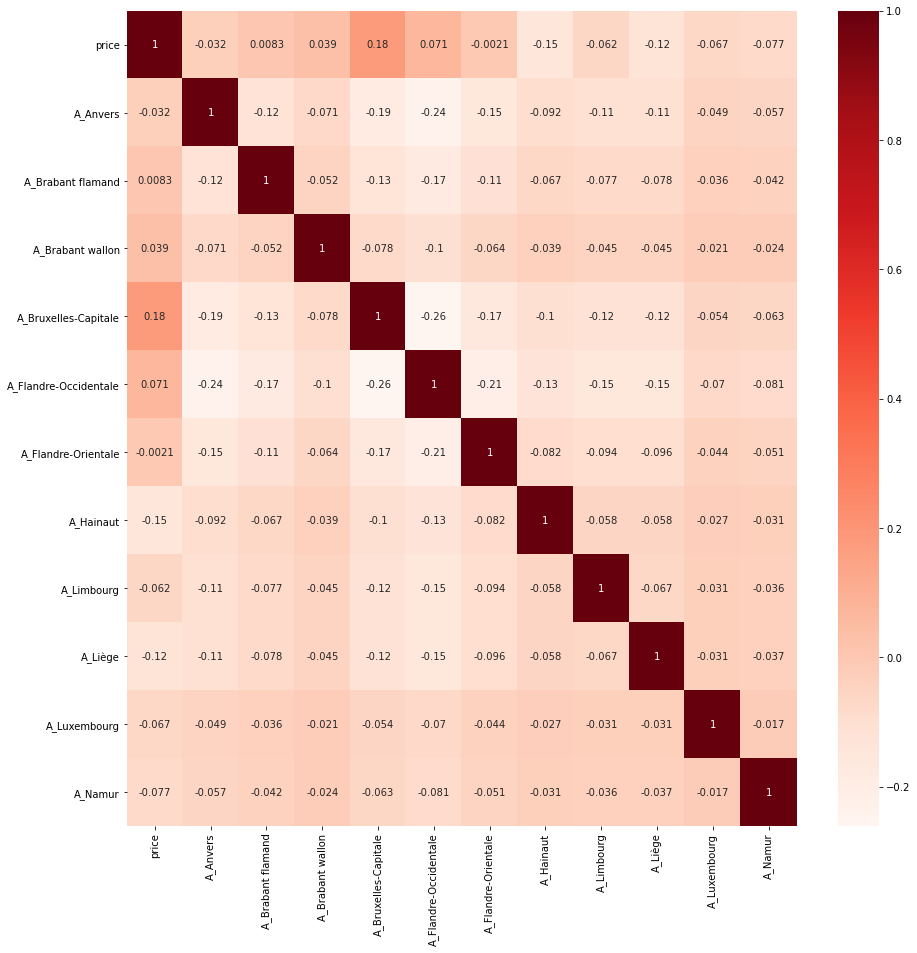

In [113]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(AOH_prov_corr, xticklabels=AOH_prov_corr.columns, yticklabels=AOH_prov_corr.columns, annot=True, cmap="Reds")

### Correlation region (dummy coding) - price

In [114]:
AOH_region = pd.get_dummies(apart[['price','région']], prefix='A',columns = ['région'], drop_first=False)
AOH_region.head(3)

,price,A_Région Bruxelles-capitale,A_Région flamande,A_Région wallonne
3665,45000,0,0,1
3666,25000,0,0,1
3667,25000,0,0,1


In [115]:
AOH_reg_corr = AOH_region.corr()

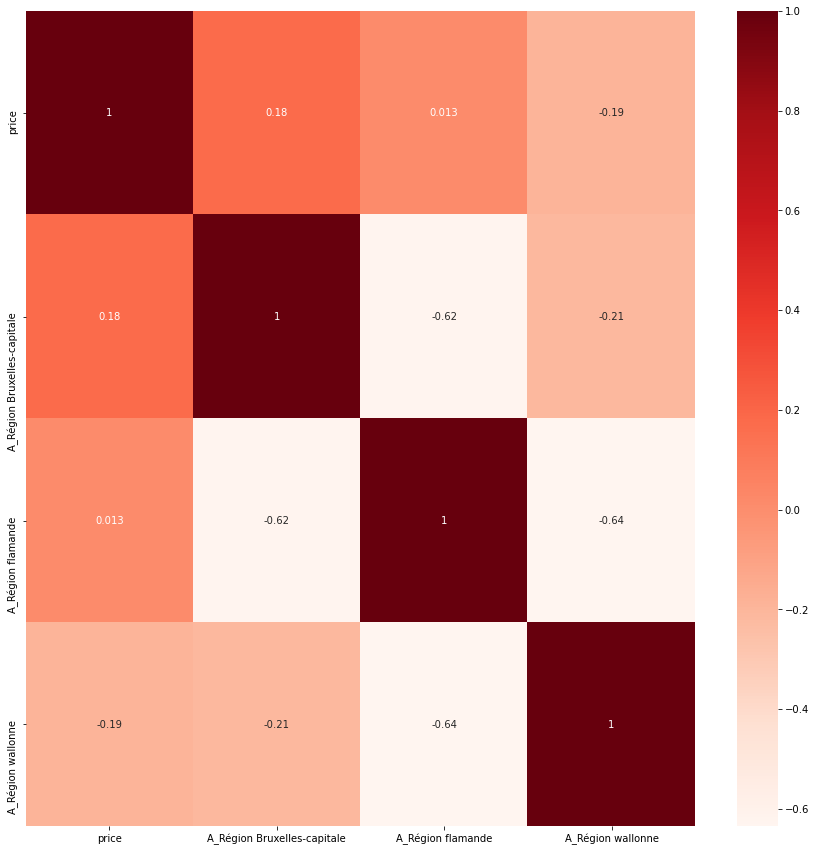

In [116]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(AOH_reg_corr, xticklabels=AOH_reg_corr.columns, yticklabels=AOH_reg_corr.columns, annot=True, cmap="Reds")

### Correlation building state (dummy coding) - price

In [118]:
AOH_buildS = pd.get_dummies(apart[['price','state_of_the_building']], prefix='A',columns = ['state_of_the_building'], drop_first=False)
AOH_buildS.head(3)

,price,A_as new,A_good,A_just renovated,A_to be done up,A_to renovate,A_to restore
3665,45000,0,1,0,0,0,0
3666,25000,1,0,0,0,0,0
3667,25000,1,0,0,0,0,0


In [119]:
AOH_BS_corr = AOH_buildS.corr()

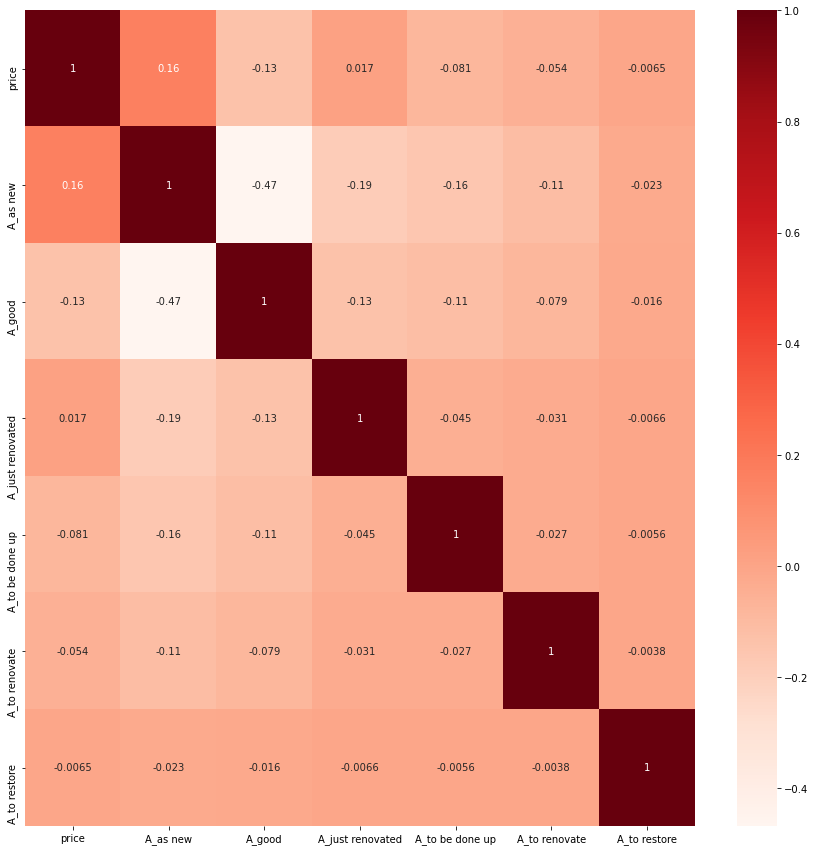

In [120]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(AOH_BS_corr, xticklabels=AOH_BS_corr.columns, yticklabels=AOH_BS_corr.columns, annot=True, cmap="Reds")

### Correlation construction_year_cat (dummy coding) - price

In [122]:
AOH_constr_year = pd.get_dummies(apart[['price','construction_year_cat']], prefix='A',columns = ['construction_year_cat'], drop_first=False)
AOH_constr_year.head(3)

,price,A_1900-1919,A_1920-1939,A_1940-1959,A_1960-1979,A_1980-1999,A_2000-,A_older than 1900
3665,45000,0,0,1,0,0,0,0
3666,25000,0,0,0,1,0,0,0
3667,25000,0,0,0,0,0,0,0


In [123]:
AOH_constr_year_corr = AOH_constr_year.corr()

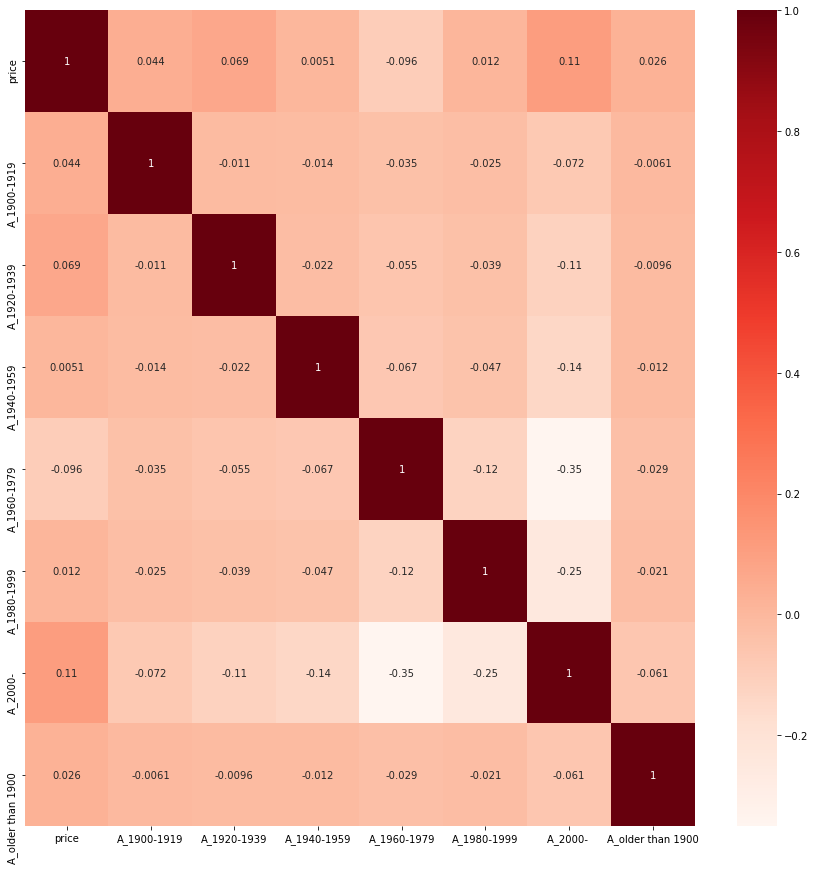

In [125]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(AOH_constr_year_corr, xticklabels=AOH_constr_year_corr.columns, yticklabels=AOH_constr_year_corr.columns, annot=True, cmap="Reds")